In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

from cancer_estimator_model import datasets

# Carregar o dataset 
df = datasets.get_integrated_dataset()
display(df.head())
df.info()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,...,RUNNY_NOSE,DIARRHEA,NONE_EXPERIENCING,GENDER_TRANSGENDER,SEVERITY_MILD,SEVERITY_MODERATE,SEVERITY_NONE,SEVERITY_SEVERE,CONTACT_DONT_KNOW,COUNTRY
0,69.0,0.0,1.0,1.0,0.0,0.0,1,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74.0,1.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318109 entries, 0 to 318108
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGE                    1309 non-null    float64
 1   SMOKING                1309 non-null    float64
 2   YELLOW_FINGERS         1309 non-null    float64
 3   ANXIETY                309 non-null     float64
 4   PEER_PRESSURE          309 non-null     float64
 5   CHRONIC_DISEASE        309 non-null     float64
 6   FATIGUE                318109 non-null  int64  
 7   ALLERGY                309 non-null     float64
 8   WHEEZING               1309 non-null    float64
 9   ALCOHOL_CONSUMING      309 non-null     float64
 10  COUGHING               318109 non-null  int64  
 11  SHORTNESS_OF_BREATH    318109 non-null  int64  
 12  SWALLOWING_DIFFICULTY  318109 non-null  int64  
 13  CHEST_PAIN             318109 non-null  int64  
 14  LUNG_CANCER_RISK       1309 non-null

In [2]:
# Dividir o conjunto de dados em features (X) e variável alvo (y)
X = df.drop(columns=['LUNG_CANCER_RISK','COUNTRY'])
y = df['LUNG_CANCER_RISK']

# Dividir o conjunto de dados em train and test
X_train = X[X.SOURCE != 3]  # dropa os dados que tem a source 3 (dataset covid)
X_test = X[X.SOURCE == 3]   # coloca somente os dados com a source 3 no teste (dataset covid)
y_train = y[X.SOURCE != 3]  # dropa os dados que tem a source 3 (dataset covid) na target
# y_test = y[X.SOURCE == 3]   # NÃO HÁ ROTULOS NESSE DATASET


/home/lerax/Desktop/workspace/cancer-estimator-model/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


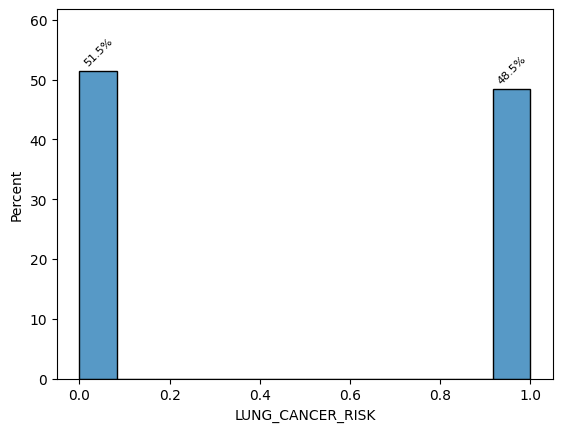

In [3]:
def plot_y_distribution(y):
    # Criando distribuição da variável resposta estimada
    ax = sns.histplot(y, stat='percent')
    
    
    # add annotations
    for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=45, padding=2)
        
        ax.margins(y=0.2)
    plt.show()
plot_y_distribution(y)

# Cross validation with catboost

0:	learn: 0.0000000	total: 818us	remaining: 408ms
100:	learn: 0.9894068	total: 129ms	remaining: 509ms
200:	learn: 0.9978992	total: 267ms	remaining: 398ms
300:	learn: 0.9978992	total: 402ms	remaining: 266ms
400:	learn: 0.9989507	total: 542ms	remaining: 134ms
499:	learn: 0.9989507	total: 679ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       170
         1.0       0.99      0.99      0.99       158

    accuracy                           0.99       328
   macro avg       0.99      0.99      0.99       328
weighted avg       0.99      0.99      0.99       328



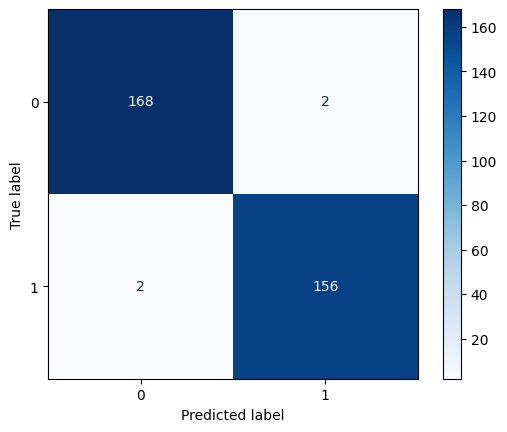

0:	learn: 0.0000000	total: 1.68ms	remaining: 839ms
100:	learn: 0.9904762	total: 136ms	remaining: 536ms
200:	learn: 0.9978992	total: 291ms	remaining: 433ms
300:	learn: 0.9989507	total: 433ms	remaining: 286ms
400:	learn: 0.9989507	total: 583ms	remaining: 144ms
499:	learn: 0.9989507	total: 718ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       169
         1.0       0.97      1.00      0.98       158

    accuracy                           0.98       327
   macro avg       0.98      0.99      0.98       327
weighted avg       0.99      0.98      0.98       327



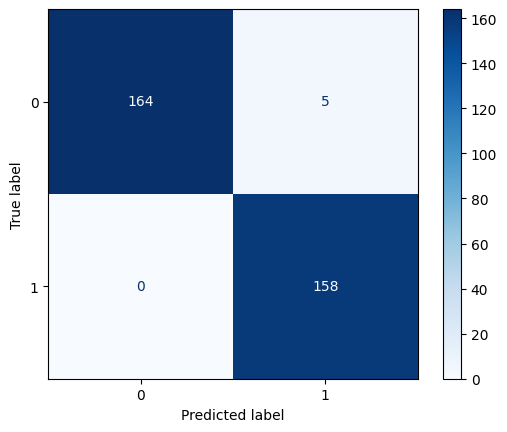

0:	learn: 0.0000000	total: 817us	remaining: 408ms
100:	learn: 0.9937500	total: 132ms	remaining: 523ms
200:	learn: 0.9979253	total: 273ms	remaining: 406ms
300:	learn: 1.0000000	total: 408ms	remaining: 270ms
400:	learn: 1.0000000	total: 557ms	remaining: 138ms
499:	learn: 1.0000000	total: 697ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       175
         1.0       1.00      0.95      0.98       152

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



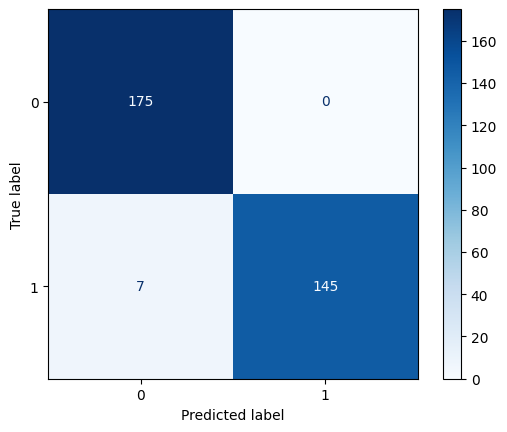

0:	learn: 0.0000000	total: 821us	remaining: 410ms
100:	learn: 0.9946294	total: 130ms	remaining: 514ms
200:	learn: 0.9978587	total: 269ms	remaining: 400ms
300:	learn: 0.9978587	total: 412ms	remaining: 273ms
400:	learn: 0.9989305	total: 557ms	remaining: 138ms
499:	learn: 0.9989305	total: 705ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       160
         1.0       0.98      0.96      0.97       167

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



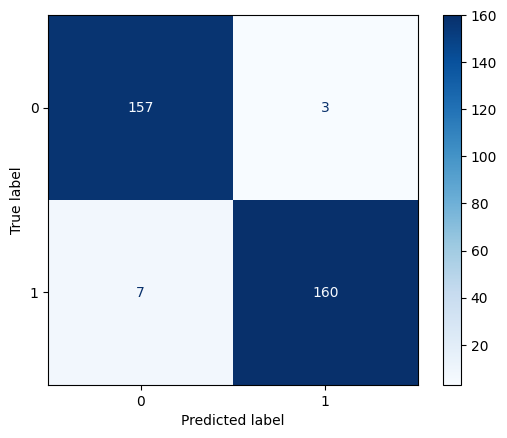

Pontuações de validação cruzada: [0.98734177 0.98442368 0.97643098 0.96969697]
Média e desvio padrão das pontuações de validação cruzada: 0.9795±0.0069


In [13]:
# Definir colunas categóricas
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Criar o pré-processador para codificar variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar pré-processamento aos dados
X_train_encoded = pd.DataFrame(preprocessor.fit_transform(X_train), columns=X_train.columns)
X_test_encoded = pd.DataFrame(preprocessor.transform(X_test), columns=X_test.columns)
# Criar o modelo CatBoostClassifier
model = CatBoostClassifier(
    iterations=500, 
    depth=6,
    eval_metric="F1",
    learning_rate=0.1, 
    loss_function='Logloss', 
    class_weights=[10, 1],
    verbose=100
)

# Definir o número de dobras para a validação cruzada
n_folds = 4

def custom_scoring(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    print(report)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    return f1_score(y_true, y_pred)
    

# Criar o objeto de validação cruzada
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Realizar a validação cruzada
scores = cross_val_score(
    model, X_train_encoded, y_train, 
    cv=kf, scoring=make_scorer(custom_scoring)
)
rscores = np.round(scores, decimals=4)
mean = np.round(np.mean(scores), decimals=4)
std = np.round(np.std(scores), decimals=4)
# Exibir as pontuações de validação cruzada
print("Pontuações de validação cruzada:", scores)
# Exibir a média das pontuações de validação cruzada
print(f"Média e desvio padrão das pontuações de validação cruzada: {mean}±{std}")


# Evaluating model in COVID dataset (300k+ samples)

0:	learn: 0.0000000	total: 869us	remaining: 434ms
100:	learn: 0.9896579	total: 157ms	remaining: 620ms
200:	learn: 0.9968404	total: 311ms	remaining: 463ms
300:	learn: 0.9968404	total: 461ms	remaining: 304ms
400:	learn: 0.9992120	total: 613ms	remaining: 151ms
499:	learn: 0.9992120	total: 757ms	remaining: 0us


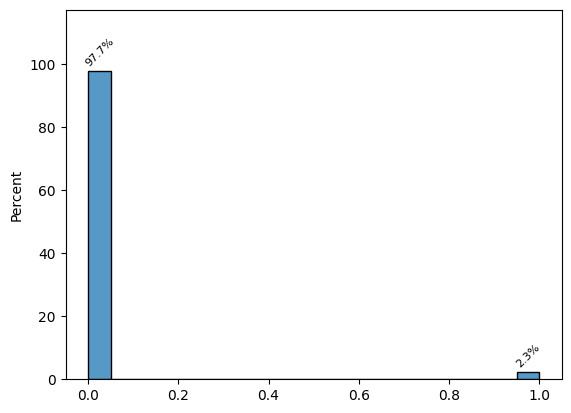

In [14]:
import warnings
# Ajustar o modelo aos dados de treino completos
warnings.simplefilter("ignore", category=FutureWarning)
model.fit(X_train_encoded, y_train)

# Fazer a predição no conjunto de dados de teste
y_pred = model.predict(X_test_encoded)

plot_y_distribution(y_pred)

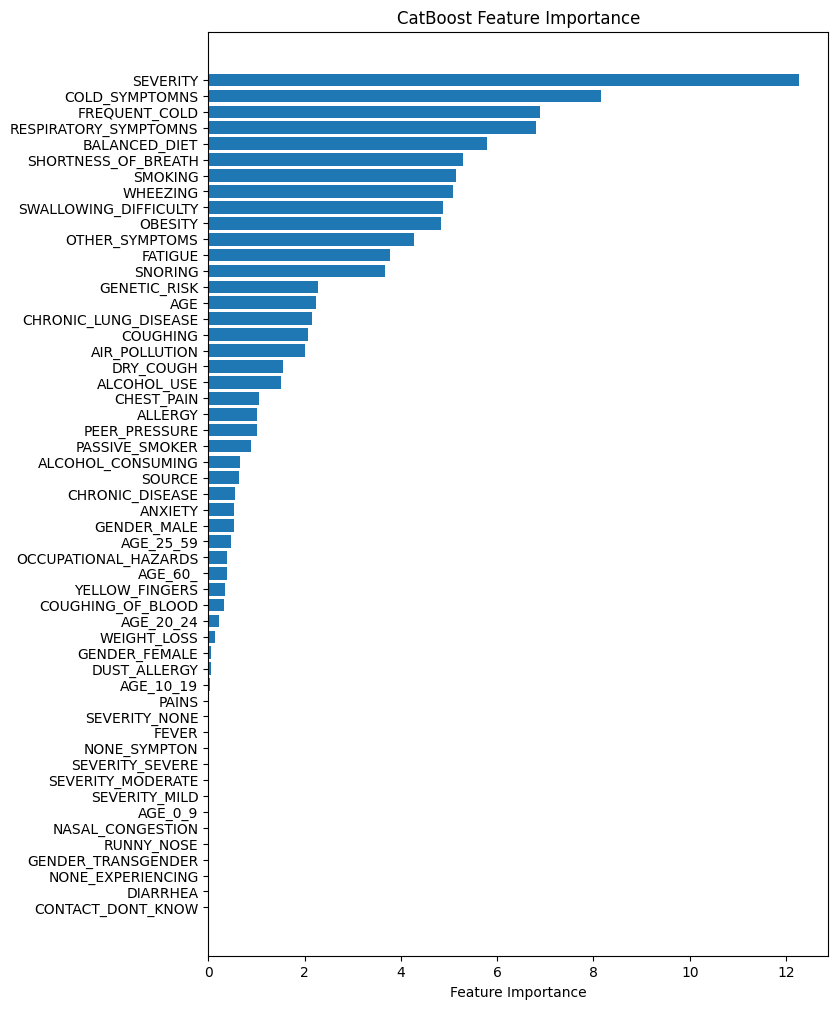

In [15]:
# plot feature importance
feature_importance = model.get_feature_importance(type='FeatureImportance')
feature_names = model.feature_names_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(8, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()